In [2]:
from qutip import *
import numpy as np
import random
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets
import matplotlib.transforms as transforms
from matplotlib import animation
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib

# Final Project TN3155: Destroying interference by measuring which path for diffraction grating

## Introduction

A short paragraph or two explaining the aim and scope of your project. Briefly: what is your project about? Which research questions will you answer? What will you try to do? 

Include 1 picture if you want that expresses the thing you are simulating / what you want to achieve. 

## Description of the physical problem being simulated

3-4 paragraphs describing the physical problem that you are simulating with your code. What is the starting point? Do you make some approximations to the Hamiltonian before simulating it? Make some predictions of what you might expect based on your physical intuition (ie. without any derivations / mathematics / code). Try to write this bit in particular from the perspective of what you knew *before* you started the project. 

Include figures: screenshots from papers, textbooks, websites, but making sure to cite your source. 

## Aim and scope of the project

A short, concise list of the questions you will answer using the simulations you will perform.

## Techniques and approach

Outline, in subsections if needed (but one section is fine if you don't!), important details of how you implemented the code. 

You do not have to document in detail each simulation you performed. And also not even the details of what you did for each of the plots in the results section, since the code you will submit will do this for you.

Instead: think about the important concepts / techniques you used and illustrate how each of these works with a simple illustration of how the code works, what it does, and how to use it. 

##  Results

Pick maximum 3 "main results" from what you have done. One result is also fine if your project was focussed on one thing. Formulate them in the form of a "message". What is the "message" you want your reader to "take home"? 

For each of these "message" make a subsection. Write code that produces figures that illustrate your message as clearly as possible. Each subsection should includee: 

* A paragraph describing what the research question the code is trying to answer and, briefly, how it does it
* The code that produces a figure. 
  * If the code is very long, you can "hide" the cell using the "toggle cell input display" notebook extension.
  * Or you can write your code in a function, like make_results_1(), separate .py  file and then  call your  function in the code sell
* A paragraph describing what the figure shows ("what you see")
* A paragraph explaining how to interpret what the figure shows

Each subsection can have multiple plots if you need more than one plot to explain your point. However, I would try to avoid more than 3 plots per "subsection". In getting your message across effectively, "less is more". It is better to have one very effective and clear plot, than a sequence of many plots that will confuse your reader. 

## Summary and Outlook

In a short paragraph or two, summarize again your "take home messages". 

In an additional paragraph, describe what you think would be the next steps: where can we go from here? What would you do if you had more time? Where can one apply the things you have learned? 

In [3]:


alpha = 3                              # Alpha
N = 50                                 # Size of the Hilbert space
steps = 100                            # Amount of time steps in the Linblad equation
end_time = np.pi                       # Screen position
t = np.linspace(0.0, end_time, steps)  # Time steps

a = destroy(N)                         # Annihilation operator
x = a + a.dag()                        # Position operator
H = (a.dag()*a + 0.5)                  # Hamiltonian

cat = (coherent(N, alpha*1j) + coherent(N, alpha*-1j)).unit()

In [4]:
def update(i, slits):
    # Initial state
    sum = 0
    for index in range(slits):
        sum += (coherent(N, i*index*1j) + coherent(N, i*index*-1j))
    cat_alpha = sum.unit()  
    
    # Propagate state to get state at screen
    result = mesolve(H, cat_alpha, t, qeye(N))
    rho = result.states[len(result.states) - 1]

    plot_wigner(rho)

interact(update, i=widgets.IntSlider(min = 0, max = 5, step = 1, value = 4), slits=widgets.IntSlider(min = 1 , max = 20, step = 2, value = 13));

interactive(children=(IntSlider(value=4, description='i', max=5), IntSlider(value=13, description='slits', max…

/home/jaydew/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: ComplexWarning: Casting complex values to real discards the imaginary part


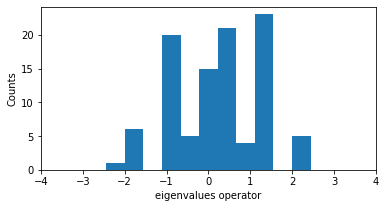

In [5]:
# Simulate a number of random collapses at the screen
collapses = 10000  # Amount of collapses
big_N = 1000       # Size of the larger Hilbert space
zoom = 4           # x-axis bounds

# Collapse function
# To simulate random collapses of the wavefunction using certain operators, we created the collapse function. This function 
# transforms the state  |ψ⟩  to the basis of eigenstates of the operator we measure with;  |ϕ1⟩,|ϕ2⟩,...|ϕN⟩ :
# |ψ⟩=∑iNci|ϕi⟩
# where the coefficients  ci=⟨ϕi|ψ⟩ . This transformation will give the vector with those coefficients, which can then be used to create a probability distribution. The probability of collapsing  |ψ⟩  to  |ϕi⟩  and thus measuring eigenvalue  λi  is  |ci|2 . However, the LME solver returns a density matrix instead of a state vector. To transform the density matrix to the basis of eigenstates and extract the needed  |ci|2 's we use the following formula:
# |ci|2=Tr(|ϕ⟩i|ϕ⟩†iρ) 
#
# where  Tr()  is the trace operation and  ρ  is the density matrix.
def collapse(rho, eigvals, eigstates):
    probs = [np.trace(rho*phi*phi.dag()) for phi in eigstates]
    probs = [0 if p < 0 else p for p in probs]
    return np.random.choice(eigvals, p=probs)
 
    
result_me = mesolve(H, cat, t, qeye(N))
rho = result_me.states[len(result_me.states) - 1]   # The last state is the state at the screen

# Transform to the basis of eigenstates of the x operator and collapse
eigvals, eigstates = x.eigenstates()
array = [collapse(rho, eigvals, eigstates) for i in range(100)]

# Plot  the result
plt.figure(figsize=(6,3))
plt.xlim(-zoom, zoom)
plt.hist(array, bins=eigvals)
plt.ylabel(r"Counts")
plt.xlabel('eigenvalues operator')
plt.show()

/home/jaydew/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: ComplexWarning: Casting complex values to real discards the imaginary part


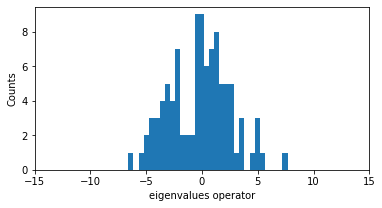

In [6]:
# Simulate a number of random collapses at the screen
collapses = 10000  # Amount of collapses
big_N = 1000       # Size of the larger Hilbert space
zoom = 15          # x-axis bounds

result_me = mesolve(H, cat, t, x)
rho = result_me.states[len(result_me.states) - 1]
eigvals, eigstates = x.eigenstates()
array = [collapse(rho, eigvals, eigstates) for i in range(100)]

# Plot  the result
plt.figure(figsize=(6,3))
plt.xlim(-zoom, zoom)
plt.hist(array, bins=eigvals)
plt.ylabel(r"Counts")
plt.xlabel('eigenvalues operator')
plt.show()

In [7]:
nb = True
%matplotlib inline

In [8]:

# Set number of frames and frames per second
Nfrm = 480
fps = 60

# Coordinates for wave sources
source3 = [-24, 12]
source1 = [-12, 12]
source0 = [0, 12]
source2 = [12, 12]
source4 = [24, 12]

sources = [source0, source1, source2, source3, source4]

In [9]:
def sine(X, Y, phi, source=source1):
    # Function is e^(-sqrt(X^2 + Y^2)) * sin(sqrt(X^2 + Y^2))
    # (with some coefficients here and there to make it look pretty)
    return .75 * np.exp(-1 * np.sqrt((X + source[0])**2 + (Y + source[1])**2) / 30) * np.sin((np.sqrt((X + source[0])**2 + (Y + source[1])**2) / 3) - phi)
    

def generate(X, Y, phi, slits=3):
    # Combine them into a single wave and reduce the scale of the waves
    R = 0
    for index in range(slits):
        R += sine(X, Y, phi, sources[index])
    return R

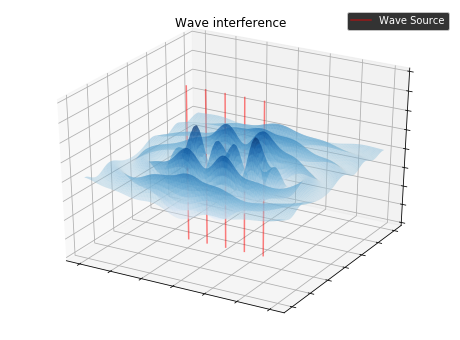

In [10]:

# Create the plot
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

# Plot styling
plt.title("Wave interference")
plt.style.use('dark_background')

# Make the X, Y meshgrid.
xs = np.linspace(-60, 60, 125)
ys = np.linspace(-60, 60, 125)
X, Y = np.meshgrid(xs, ys)

# Set the z axis limits so they aren't recalculated each frame.
ax.set_zlim(-2, 2)

# Draw wave sources as vertical line segments

source0z = np.array([-2, 2])
source0x = np.array([-source0[0], -source0[0]])
source0y = np.array([-source0[1], -source0[1]])
ax.plot3D(source0x, source0y, source0z, 'red', alpha=.5)

source1z = np.array([-2, 2])
source1x = np.array([-source1[0], -source1[0]])
source1y = np.array([-source1[1], -source1[1]])
ax.plot3D(source1x, source1y, source1z, 'red', alpha=.5)

source2z = np.array([-2, 2])
source2x = np.array([-source2[0], -source2[0]])
source2y = np.array([-source2[1], -source2[1]])
ax.plot3D(source2x, source2y, source2z, 'red', alpha=.5)


source3z = np.array([-2, 2])
source3x = np.array([-source3[0], -source3[0]])
source3y = np.array([-source3[1], -source3[1]])
ax.plot3D(source3x, source3y, source3z, 'red', alpha=.5)

source4z = np.array([-2, 2])
source4x = np.array([-source4[0], -source4[0]])
source4y = np.array([-source4[1], -source4[1]])
ax.plot3D(source4x, source4y, source4z, 'red', alpha=.5, label="Wave Source")

ax.legend()

# Remove ticklabels
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_zticklabels([])



# Begin plotting.
surface = None
no_slits = 5
Z = generate(X, Y, 0, no_slits)

def update(idx):
    phi=phis[idx]
    global surface
    # If a line collection is already remove it before drawing.
    if surface:
        # ax.collections.remove(wframe)
        ax.collections.remove(surface)

    # Plot the new surface and pause briefly before continuing.
    Z = generate(X, Y, phi * .2, no_slits)
    surface = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='Blues', alpha=.5, edgecolor='none')
       
    
phis = np.linspace(0, 180. / np.pi, Nfrm)
ani = animation.FuncAnimation(fig, update, Nfrm, interval=2000/fps)
plt.show()